# Importing Libraries and dataset

In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
products = pd.read_csv("data.csv", encoding='unicode_escape')

In [7]:
products

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [8]:
#Statistical analysis of each features of the dataset
products.describe(include="all")

InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

             InvoiceDate      UnitPrice     CustomerID         Country  
count             541909  541909.000000  406829.000000          541909  
unique             23260            NaN            NaN              38  
top     10/31/2011 14:41            NaN            NaN  United Kingdom  
freq                1114            NaN            NaN          495478  
mean                 NaN       4.611114   15287.690570             NaN  
std                  NaN      96.759853    1713.600303             NaN  
min                  NaN  -11062.060000   12346.000000             NaN  
25%                  NaN       1.250000   13953.000000             NaN  
50%                  NaN       2.080000   15152.000000             NaN  
75%                  NaN       4.130000   16791.000000             NaN  
max                  NaN   38970.000000   18287.000000             NaN

# Data Preprocessing

In [10]:
#Checking the missing values in the dataset since it can introduce bias and can reduce the performance
fig = px.bar(x=products.columns , y = (products.isnull().sum()/products.shape[0])*100)
fig.show()

In [19]:
#Dropped this column since it was non informative and unique to each customer
products.drop("CustomerID" , axis = 1 , inplace = True)

In [20]:
#Null values in this colum was less than 5 % so it was better to drop those
products.dropna(subset=['Description'] , inplace=True)

In [21]:
#After imputation work , no null values
products.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [25]:
print("Shape of the dataset:" ,products.shape)

Shape of the dataset: (540455, 7)


In [28]:
#Checking the datatypes to ensure proper work flow
products.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
Country         object
dtype: object

In [29]:
products.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice         Country  
0  12/1/2010 8:26       2.55  United Kingdom  
1  12/1/2010 8:26       3.39  United Kingdom  
2  12/1/2010 8:26       2.75  United Kingdom  
3  12/1/2010 8:26       3.39  United Kingdom  
4  12/1/2010 8:26       3.39  United Kingdom

In [37]:
#Formatting the raw date 
products['Date'] = pd.to_datetime(products['InvoiceDate'])
products['Month-Year'] = products['Date'].dt.strftime('%b-%Y')
products.drop(['InvoiceDate','Date'],axis=1,inplace=True)


In [38]:
products

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

        UnitPrice         Country Month-Year  
0            2.55  United Kingdom   Dec-2010  
1            3.39  United Kingdom   Dec-2010  
2            2.75  United Kingdom   Dec-2010  
3            3.39  United Kingdom   Dec-2010  
4            3.39  United Kingdom   Dec-2010  
...           ...             ...        ...  
541904       0.85          France   Dec-2011  
541905       2.10          France   Dec-2011  
541906       4.15          France   Dec-2011  
541907       4.15          France   Dec-2011  
541908       4.95          France   Dec-2011  

[540455 rows x 7 columns]

# EDA

In [39]:
#Analysing products with high sales
products["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [42]:
#Checking the entities of the max sale product
products_maximum = products[products["Description"] == "WHITE HANGING HEART T-LIGHT HOLDER" ]
products_maximum

InvoiceNo StockCode                         Description  Quantity  \
0         536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
49        536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
66        536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
220       536390    85123A  WHITE HANGING HEART T-LIGHT HOLDER        64   
262       536394    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   
...          ...       ...                                 ...       ...   
537291    581246    85123A  WHITE HANGING HEART T-LIGHT HOLDER         1   
537326    581253    85123A  WHITE HANGING HEART T-LIGHT HOLDER         2   
537852    581356    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
539979    581452    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   
540217    581472    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

        UnitPrice         Country Month-Year  
0            2.55  United Kingdom   Dec-2010  
49           2.55  United Kingdom   Dec-2010  
66           2.55  United Kingdom   Dec-2010  
220          2.55  United Kingdom   Dec-2010  
262          2.55  United Kingdom   Dec-2010  
...           ...             ...        ...  
537291       2.95  United Kingdom   Dec-2011  
537326       2.95  United Kingdom   Dec-2011  
537852       2.95  United Kingdom   Dec-2011  
539979       2.55  United Kingdom   Dec-2011  
540217       2.95  United Kingdom   Dec-2011  

[2369 rows x 7 columns]

In [43]:
#Now lets even check the entities of 2nd highest sale product
products_sec_maximum = products[products["Description"] == "REGENCY CAKESTAND 3 TIER" ]
products_sec_maximum

InvoiceNo StockCode               Description  Quantity  UnitPrice  \
880       536477     22423  REGENCY CAKESTAND 3 TIER        16      10.95   
936       536502     22423  REGENCY CAKESTAND 3 TIER         2      12.75   
1092      536525     22423  REGENCY CAKESTAND 3 TIER         2      12.75   
1155      536528     22423  REGENCY CAKESTAND 3 TIER         1      12.75   
1197      536530     22423  REGENCY CAKESTAND 3 TIER         1      12.75   
...          ...       ...                       ...       ...        ...   
539891    581449     22423  REGENCY CAKESTAND 3 TIER         1      12.75   
539892    581449     22423  REGENCY CAKESTAND 3 TIER         1      12.75   
540216    581472     22423  REGENCY CAKESTAND 3 TIER         2      12.75   
541231    581495     22423  REGENCY CAKESTAND 3 TIER        10      12.75   
541290    581497     22423  REGENCY CAKESTAND 3 TIER         8      24.96   

               Country Month-Year  
880     United Kingdom   Dec-2010  
936     United Kingdom   Dec-2010  
1092    United Kingdom   Dec-2010  
1155    United Kingdom   Dec-2010  
1197    United Kingdom   Dec-2010  
...                ...        ...  
539891  United Kingdom   Dec-2011  
539892  United Kingdom   Dec-2011  
540216  United Kingdom   Dec-2011  
541231  United Kingdom   Dec-2011  
541290  United Kingdom   Dec-2011  

[2200 rows x 7 columns]

In [47]:
#We can se that even the quantities are varying , so lets check according to the quantity
products_q = products.groupby('Description')['Quantity'].sum().reset_index()
products_q.columns = ['Description', 'Total Quantity']
products_q

Description  Total Quantity
0      4 PURPLE FLOCK DINNER CANDLES             144
1      50'S CHRISTMAS GIFT BAG LARGE            1913
2                  DOLLY GIRL BEAKER            2448
3        I LOVE LONDON MINI BACKPACK             389
4        I LOVE LONDON MINI RUCKSACK               1
...                              ...             ...
4218     wrongly marked carton 22804            -256
4219    wrongly marked. 23343 in box           -3100
4220    wrongly sold (22719) barcode             170
4221            wrongly sold as sets            -600
4222               wrongly sold sets            -975

[4223 rows x 2 columns]

In [50]:
Top_10 = products_q.sort_values(by='Total Quantity', ascending=False).head(10)
Top_10


Description  Total Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS           53847
1866             JUMBO BAG RED RETROSPOT           47363
244        ASSORTED COLOUR BIRD ORNAMENT           36381
2740                      POPCORN HOLDER           36334
2395     PACK OF 72 RETROSPOT CAKE CASES           36039
3918  WHITE HANGING HEART T-LIGHT HOLDER           35317
2803                  RABBIT NIGHT LIGHT           30680
2161             MINI PAINT SET VINTAGE            26437
2361          PACK OF 12 LONDON TISSUES            26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES           24753

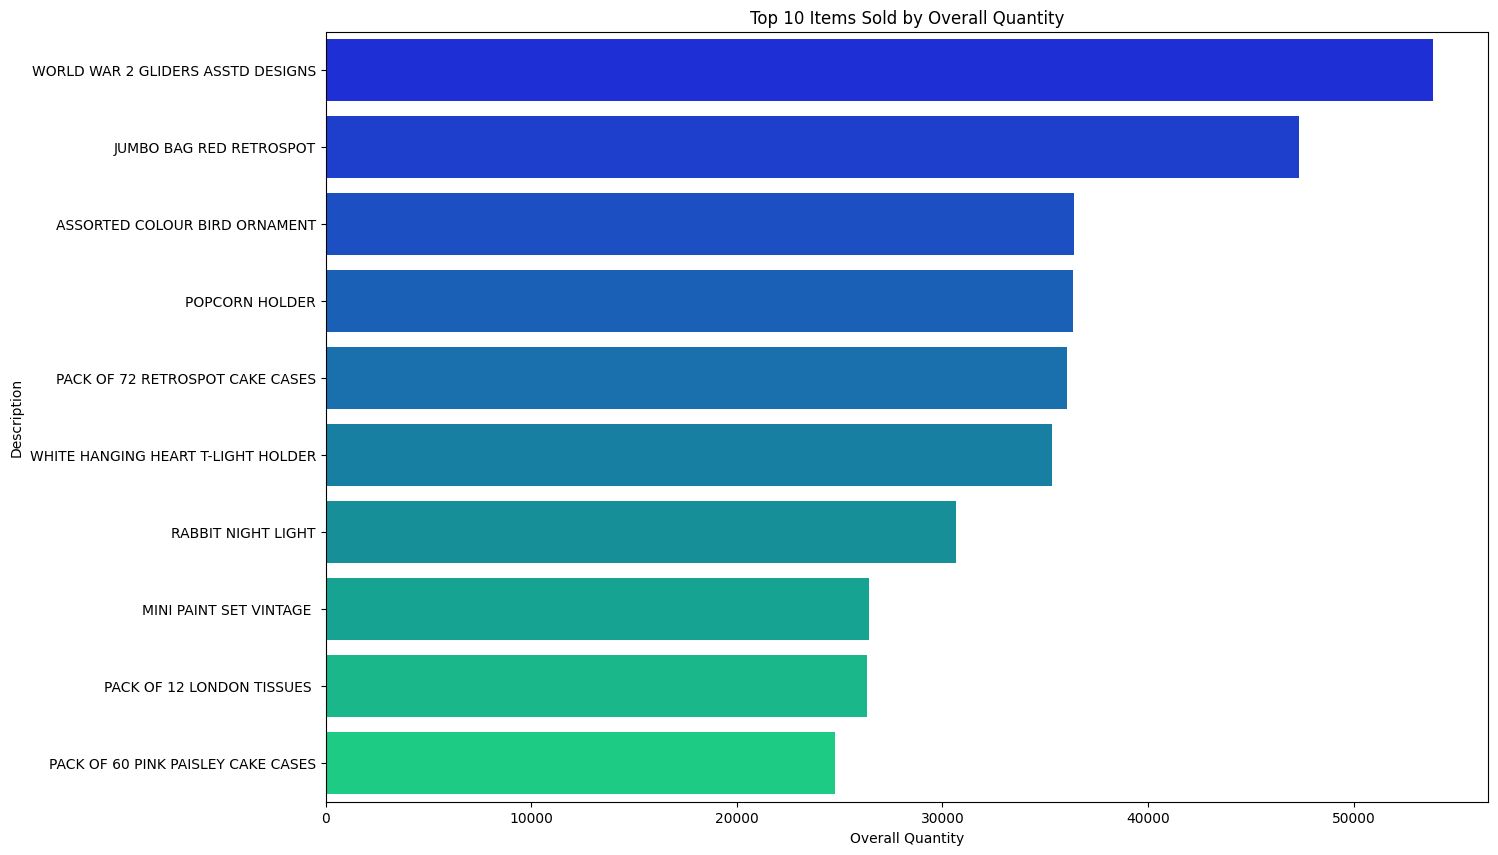

In [61]:
#Top 10 items 
plt.figure(figsize=(15, 10))
sns.barplot(data=Top_10, x="Total Quantity", y="Description", capsize=3, palette="winter")
plt.title("Top 10 Items Sold by Overall Quantity")
plt.xlabel("Overall Quantity")
plt.ylabel("Description")
plt.show()

In [63]:
#Lets extract top 15 products based on the unit price 
products_expensive = products.sort_values(by = "UnitPrice" , ascending=False).head(15)
products_expensive

InvoiceNo  StockCode      Description  Quantity  UnitPrice  \
222681   C556445          M           Manual        -1   38970.00   
524602   C580605  AMAZONFEE       AMAZON FEE        -1   17836.46   
43702    C540117  AMAZONFEE       AMAZON FEE        -1   16888.02   
43703    C540118  AMAZONFEE       AMAZON FEE        -1   16453.71   
15016    C537630  AMAZONFEE       AMAZON FEE        -1   13541.33   
15017     537632  AMAZONFEE       AMAZON FEE         1   13541.33   
16356    C537651  AMAZONFEE       AMAZON FEE        -1   13541.33   
16232    C537644  AMAZONFEE       AMAZON FEE        -1   13474.79   
524601   C580604  AMAZONFEE       AMAZON FEE        -1   11586.50   
299982   A563185          B  Adjust bad debt         1   11062.06   
446533   C574902  AMAZONFEE       AMAZON FEE        -1    8286.22   
173382    551697       POST          POSTAGE         1    8142.75   
173277   C551685       POST          POSTAGE        -1    8142.75   
342635   C566899  AMAZONFEE       AMAZON FEE        -1    7427.97   
191386   C553355  AMAZONFEE       AMAZON FEE        -1    7006.83   

               Country Month-Year  
222681  United Kingdom   Jun-2011  
524602  United Kingdom   Dec-2011  
43702   United Kingdom   Jan-2011  
43703   United Kingdom   Jan-2011  
15016   United Kingdom   Dec-2010  
15017   United Kingdom   Dec-2010  
16356   United Kingdom   Dec-2010  
16232   United Kingdom   Dec-2010  
524601  United Kingdom   Dec-2011  
299982  United Kingdom   Aug-2011  
446533  United Kingdom   Nov-2011  
173382  United Kingdom   May-2011  
173277  United Kingdom   May-2011  
342635  United Kingdom   Sep-2011  
191386  United Kingdom   May-2011

In [64]:
# We can see that all the expensive products quantity is -1 , also means they are bought rare

In [67]:
#Lets look to the top 5 countries 
country_counts = products['Country'].value_counts()

# Select the top 5 countries
top_5_countries = country_counts.head()

# Convert the top countries data into a DataFrame
top_5_df = top_5_countries.reset_index()
top_5_df.columns = ['country', 'count']

# Create a bar plot using Plotly Express
fig = px.bar(top_5_df, x='country', y='count', title='Top 5 Countries')

# Show the plot
fig.show()

In [ ]:
#Visualizing number of sales based on months
products['month'] = products["Month-Year"].str[:3]
month_count_value = products["month"].value_counts()
month_count_value=month_count_value.sort_values()
fig = px.bar(x=month_count_value.index , y = month_count_value.values)
fig.show()

In [98]:
#Visualizing number of sales based on years
products['year'] = products["Month-Year"].str[4:]
year_count_value = products["year"].value_counts()
year_count_value=year_count_value.sort_values()


fig = px.bar(x=year_count_value.index , y = year_count_value.values)
fig.show()




In [ ]:
#Removing non informative features
products.drop("Description" , axis=1, inplace=True)
products.drop("StockCode" , axis=1, inplace=True)
products.drop("InvoiceNo" , axis=1, inplace=True)
products.drop("Month-Year" , axis=1, inplace=True)
products.drop("year" , axis=1, inplace=True)
products.drop("month" , axis=1, inplace=True)

In [103]:
products

Quantity  UnitPrice         Country
0              6       2.55  United Kingdom
1              6       3.39  United Kingdom
2              8       2.75  United Kingdom
3              6       3.39  United Kingdom
4              6       3.39  United Kingdom
...          ...        ...             ...
541904        12       0.85          France
541905         6       2.10          France
541906         4       4.15          France
541907         4       4.15          France
541908         3       4.95          France

[540455 rows x 3 columns]

In [ ]:
#Encoding Categorical column to Numerical column
categorical_cols = ["Country"]

In [104]:
from sklearn.preprocessing import LabelEncoder
Lc = LabelEncoder()
products["Country"]= Lc.fit_transform(products["Country"])

In [105]:
products

Quantity  UnitPrice  Country
0              6       2.55       36
1              6       3.39       36
2              8       2.75       36
3              6       3.39       36
4              6       3.39       36
...          ...        ...      ...
541904        12       0.85       13
541905         6       2.10       13
541906         4       4.15       13
541907         4       4.15       13
541908         3       4.95       13

[540455 rows x 3 columns]

In [106]:
#Adding total price column
products['Total Price'] = products['UnitPrice'] * products['Quantity']
products.head()

Quantity  UnitPrice  Country  Total Price
0         6       2.55       36        15.30
1         6       3.39       36        20.34
2         8       2.75       36        22.00
3         6       3.39       36        20.34
4         6       3.39       36        20.34

<AxesSubplot: >

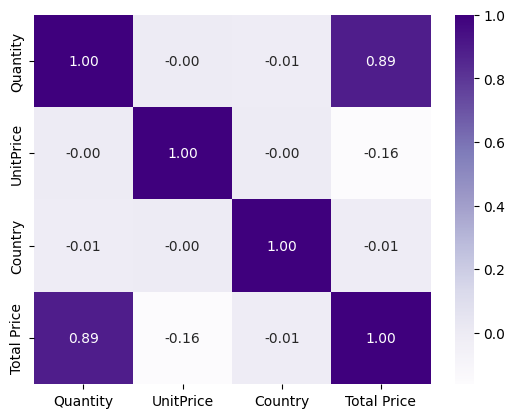

In [113]:
#Analysing Correlation
sns.heatmap(products.corr(), cmap='Purples', annot=True, fmt=".2f")

# Data spliting and Modelling

In [114]:
#Splitting the dataset
X = products.drop("Total Price" , axis =1)

#Since we need to predict total price only so let make it our target dependent variable

y = products["Total Price"]

In [115]:
X

Quantity  UnitPrice  Country
0              6       2.55       36
1              6       3.39       36
2              8       2.75       36
3              6       3.39       36
4              6       3.39       36
...          ...        ...      ...
541904        12       0.85       13
541905         6       2.10       13
541906         4       4.15       13
541907         4       4.15       13
541908         3       4.95       13

[540455 rows x 3 columns]

In [116]:
y

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Total Price, Length: 540455, dtype: float64

In [117]:
#Train test split
from sklearn.model_selection import train_test_split


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [120]:
#Modelling Part
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [122]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=104, random_state=42),
    Lasso(alpha = 10),
    Ridge(alpha = 10)
]

# Model Selection

In [126]:
for mo in models:
    mo.fit(X_train, y_train)
    y_pred = mo.predict(X_test)
    
    r2_value = r2_score(y_test,y_pred)
    print(f"{mo.__class__.__name__} R2 Score: {r2_value}")

LinearRegression R2 Score: 0.7510053254384752
RandomForestRegressor R2 Score: 0.23141765659557267
Lasso R2 Score: 0.7708431661652508
Ridge R2 Score: 0.7510249006566287


<div class="alert alert-block alert-info""> Insights: 
                                          
Now our model is ready after being trained we have used 4 regressor out of which r2 lasso is giving the best result currently.So we will go with that now</div> 

In [127]:
r2_lasso = []

In [128]:
for x in range(10,500,10):
    model_l = Lasso(alpha = x)
    model_l.fit(X_train, y_train)
    y_pred = model_l.predict(X_test)

    r2_value = r2_score(y_test,y_pred)
    r2_lasso.append(r2_value)

In [129]:
#Varios results based on changing the hyperparameter
r2_lasso

[0.7708431661652508,
 0.7848088566806755,
 0.7929348664595779,
 0.8007956732676885,
 0.8106115280398071,
 0.8162851121013124,
 0.8178164254522047,
 0.8152054680924836,
 0.8084522400221494,
 0.797556741241202,
 0.7825189717496415,
 0.7633389315474678,
 0.7400166206346809,
 0.712552039011281,
 0.6809451866772674,
 0.6451960636326409,
 0.6053046698774014,
 0.5612710054115485,
 0.5130950702350825,
 0.46077686434800325,
 0.40431638775031076,
 0.34371364044200525,
 0.2789686224230865,
 0.21008133369355475,
 0.13705177425340975,
 0.05987994410265163,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,
 -4.538539260190433e-06,


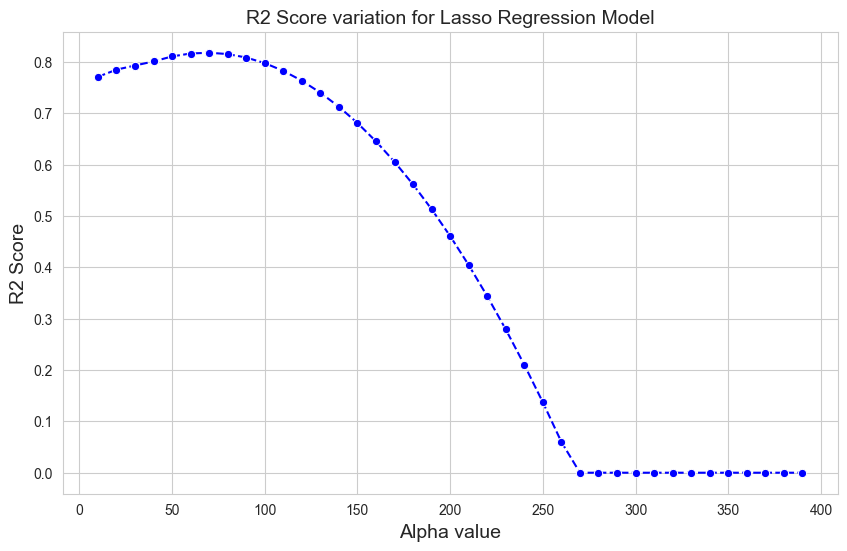

In [130]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(10,400,10)), y=r2_lasso[:39], marker='o', color='blue', linestyle = 'dashed')
plt.title('R2 Score variation for Lasso Regression Model',fontsize=14)
plt.xlabel('Alpha value',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

In [131]:
max(r2_lasso)

0.8178164254522047

<div class="alert alert-block alert-info""> 
                                          
Our model is completed and ready to deploy , the regressor selection can be done based on user reequirement and type of the dataset</div> 